#Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico

Authors: Fabio MendozaPalechor;; Alexis de la HozManotas https://doi.org/10.1016/j.dib.2019.104344

This paper presents data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 

77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform. This data can be used to generate intelligent computational tools to identify the obesity level of an individual and to build recommender systems that monitor obesity levels. For discussion and more information of the dataset creation, please refer to the full-length article “Obesity Level Estimation Software based on Decision Trees” https://www.sciencedirect.com/science/article/pii/S2352340919306985

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/obesity-levels/ObesityDataSet_raw_and_data_sinthetic.csv
/kaggle/input/obesity-levels/ObesityDataSet_raw_and_data_sinthetic.arff


#Attributes related with eating habits are:

Frequent consumption of high caloric food (FAVC),

Frequency of consumption of vegetables (FCVC), 

Number of main meals (NCP),

Consumption of food between meals (CAEC), 

Consumption of water daily (CH20),

and Consumption of alcohol (CALC).

#Attributes related with the physical condition are:

Calories consumption monitoring (SCC),

Physical activity frequency (FAF),

Time using technology devices (TUE),

Transportation used (MTRANS),

#Other variables were:

Gender, Age, Height and Weight.

Finally, all data was labeled and the class variable NObesity was created with the values of: Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III, based on Equation (1) and information from WHO and Mexican Normativity.

The data contains numerical data and continous data, so it can be used for analysis based on algorithms of classification, prediction, segmentation and association. Data is available in CSV format and ARFF format to be used with the Weka tool.https://www.sciencedirect.com/science/article/pii/S2352340919306985

In [2]:
df = pd.read_csv('../input/obesity-levels/ObesityDataSet_raw_and_data_sinthetic.csv', encoding='ISO-8859-2')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


#Spoiler Alert:No Missing Values.

In [3]:
print(f"data shape: {df.shape}")

data shape: (2111, 17)


In [4]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


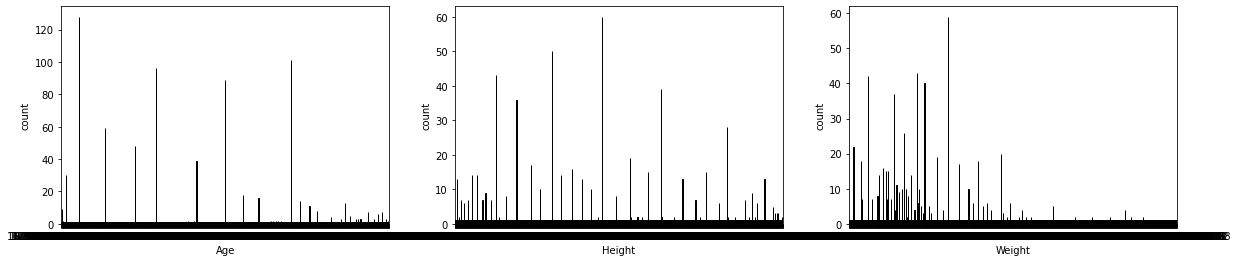

In [5]:
plt.figure(figsize=(20,4))
plt.subplot(131)
sns.countplot(x= 'Age', data = df, palette="GnBu_d",edgecolor="black")
plt.subplot(132)
sns.countplot(x= 'Height', data = df, palette="flag",edgecolor="black")
plt.subplot(133)
sns.countplot(x= 'Weight', data = df, palette="Greens_r",edgecolor="black")
plt.show()

In [6]:
#Codes from Gabriel Preda

def plot_count(feature, title, df, size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()

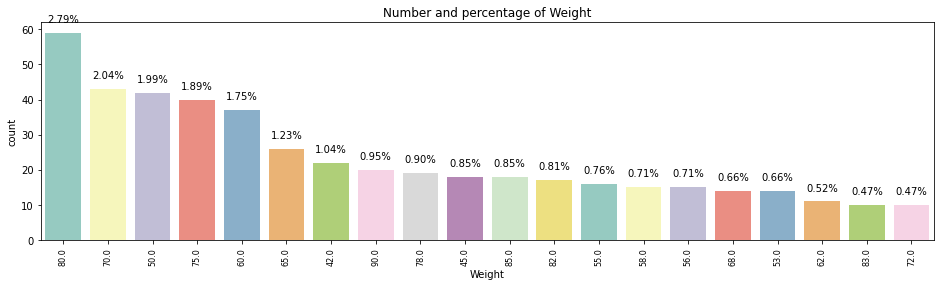

In [7]:
plot_count("Weight", "Weight", df,4)

#Univariate analysis

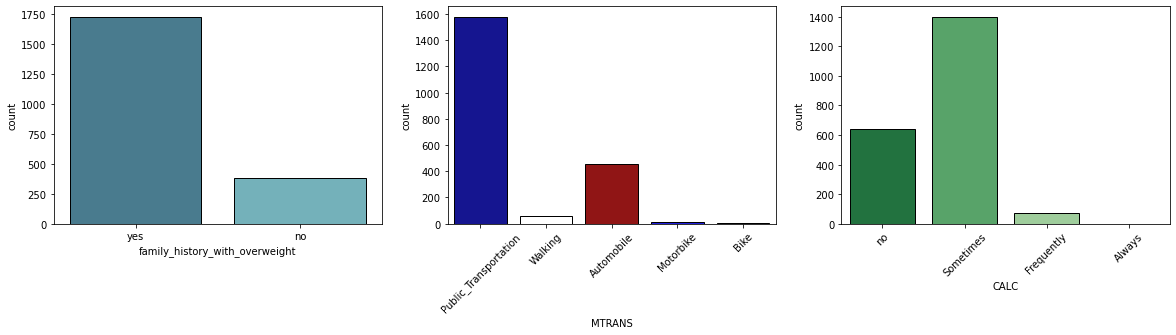

In [8]:
plt.figure(figsize=(20,4))
plt.subplot(131)
sns.countplot(x= 'family_history_with_overweight', data = df, palette="GnBu_d",edgecolor="black")
plt.subplot(132)
sns.countplot(x= 'MTRANS', data = df, palette="flag",edgecolor="black")
plt.xticks(rotation=45)
plt.subplot(133)
sns.countplot(x= 'CALC', data = df, palette="Greens_r",edgecolor="black")
plt.xticks(rotation=45)
plt.show()

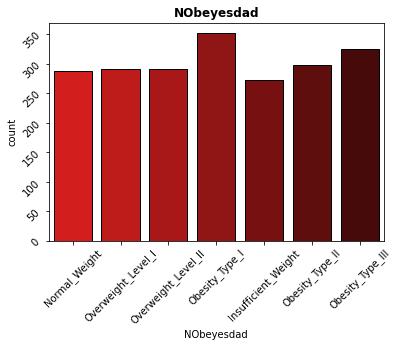

In [9]:
sns.countplot(x="NObeyesdad",data=df,palette="flag",edgecolor="black")
plt.title('NObeyesdad', weight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
# changing the font size
sns.set(font_scale=1)

#Bivariate analysis

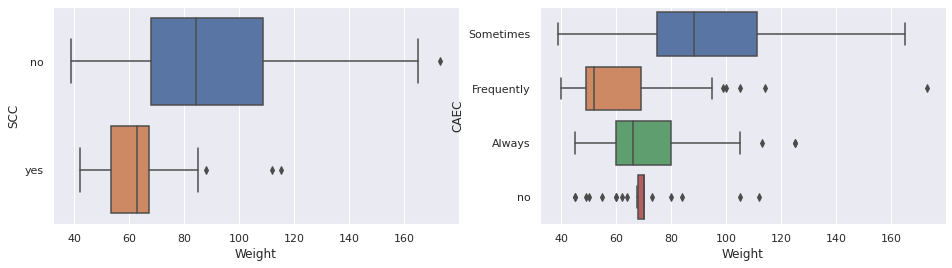

In [10]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
sns.boxplot(x = 'Weight', y = 'SCC', data = df)
plt.subplot(122)
sns.boxplot(x = 'Weight', y = 'CAEC', data = df)
plt.show()

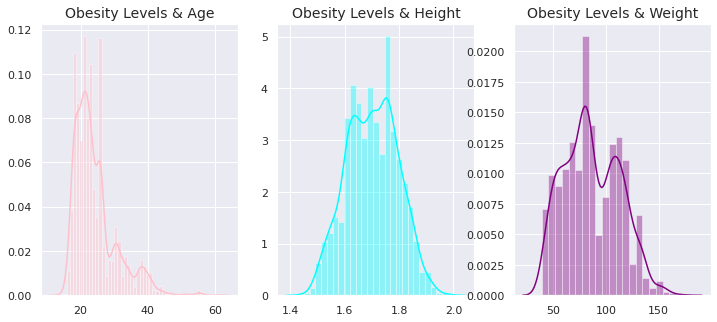

In [11]:
# Distribution of different type of amount
fig , ax = plt.subplots(1,3,figsize = (12,5))

Age = df.Age.values
Height= df.Height.values
Weight = df.Weight.values

sns.distplot(Age , ax = ax[0] , color = 'pink').set_title('Obesity Levels & Age' , fontsize = 14)
sns.distplot(Height , ax = ax[1] , color = 'cyan').set_title('Obesity Levels & Height' , fontsize = 14)
sns.distplot(Weight , ax = ax[2] , color = 'purple').set_title('Obesity Levels & Weight' , fontsize = 14)


plt.show()

In [12]:
import plotly.express as px
fig = px.line(df, x="Weight", y="TUE", color_discrete_sequence=['darksalmon'], 
              title="Obesity Levels and the Use of Technology")
fig.show()

I tried to make a Decision Tree Graphviz. It didn't work, then I gave up.

Das War's Kaggle Notebook Runner: Marília Prata  @mpwolke